In [1]:
import os
import pandas as pd
import numpy as np

# Step 1: Define project root path
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Step 2: Define data paths
features_path = os.path.join(project_root, "data", "processed", "cleaned_features.csv")
labels_path = os.path.join(project_root, "data", "processed", "encoded_labels.npy")
tags_path = os.path.join(project_root, "data", "processed", "tag_classes.txt")

# Step 3: Load data
X = pd.read_csv(features_path)
Y = np.load(labels_path)

# Step 4: Load tag classes
with open(tags_path, 'r') as f:
    tag_classes = f.read().splitlines()

# Step 5: Confirm loading
print("✅ Data loaded successfully.")
print(f"📄 Features shape: {X.shape}")
print(f"🏷️ Labels shape: {Y.shape}")
print(f"🔖 Number of tag classes: {len(tag_classes)}")


✅ Data loaded successfully.
📄 Features shape: (31420, 5413)
🏷️ Labels shape: (31420, 3694)
🔖 Number of tag classes: 3694


Feature matrix sparsity: 1.48%

 Tags per sample (mean ± std): 2.00 ± 0.12


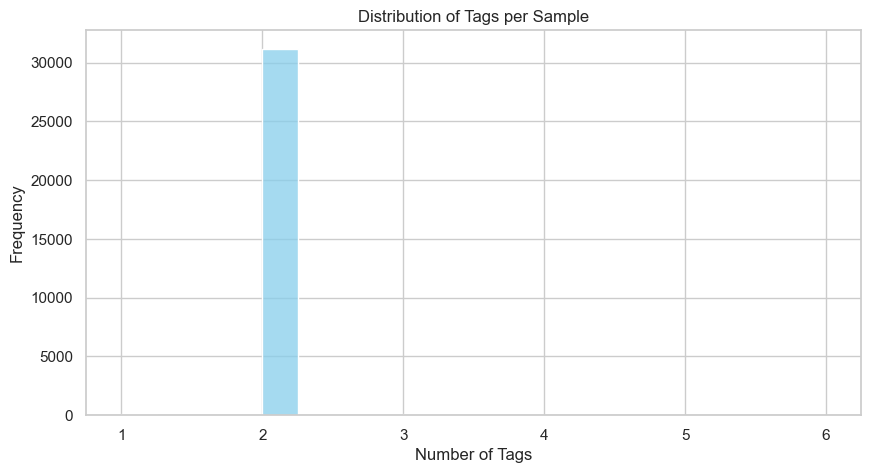


 Most common tags:
g245s → 3695 occurrences
y220c → 3688 occurrences
r273h → 3687 occurrences
r248q → 3675 occurrences
r282w → 3675 occurrences
m237i → 3674 occurrences
r175h → 3673 occurrences
r158l → 639 occurrences
p152l → 610 occurrences
r249s → 606 occurrences

 Least common tags:
t163a → 1 occurrence(s)
s241s → 1 occurrence(s)
r273r → 1 occurrence(s)
l125p → 1 occurrence(s)
k291e → 1 occurrence(s)
g121s → 1 occurrence(s)
a353v → 2 occurrence(s)
r175c → 2 occurrence(s)
r175r → 4 occurrence(s)
r282d → 6 occurrence(s)


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# 1. Feature Sparsity (percentage of zeros)
feature_sparsity = 100.0 * (X == 0).sum().sum() / (X.shape[0] * X.shape[1])
print(f"Feature matrix sparsity: {feature_sparsity:.2f}%")

# 2. Number of tags per sample
tags_per_sample = Y.sum(axis=1)
print(f"\n Tags per sample (mean ± std): {tags_per_sample.mean():.2f} ± {tags_per_sample.std():.2f}")

# 3. Plot: Distribution of tags per sample
plt.figure(figsize=(10, 5))
sns.histplot(tags_per_sample, bins=20, kde=False, color="skyblue")
plt.title("Distribution of Tags per Sample")
plt.xlabel("Number of Tags")
plt.ylabel("Frequency")
plt.show()

# 4. Frequency of tags across all samples
tag_frequencies = Y.sum(axis=0)
most_common_tags = np.argsort(tag_frequencies)[::-1][:10]
least_common_tags = np.argsort(tag_frequencies)[:10]

# Display top and bottom tags
print("\n Most common tags:")
for i in most_common_tags:
    print(f"{tag_classes[i]} → {int(tag_frequencies[i])} occurrences")

print("\n Least common tags:")
for i in least_common_tags:
    print(f"{tag_classes[i]} → {int(tag_frequencies[i])} occurrence(s)")


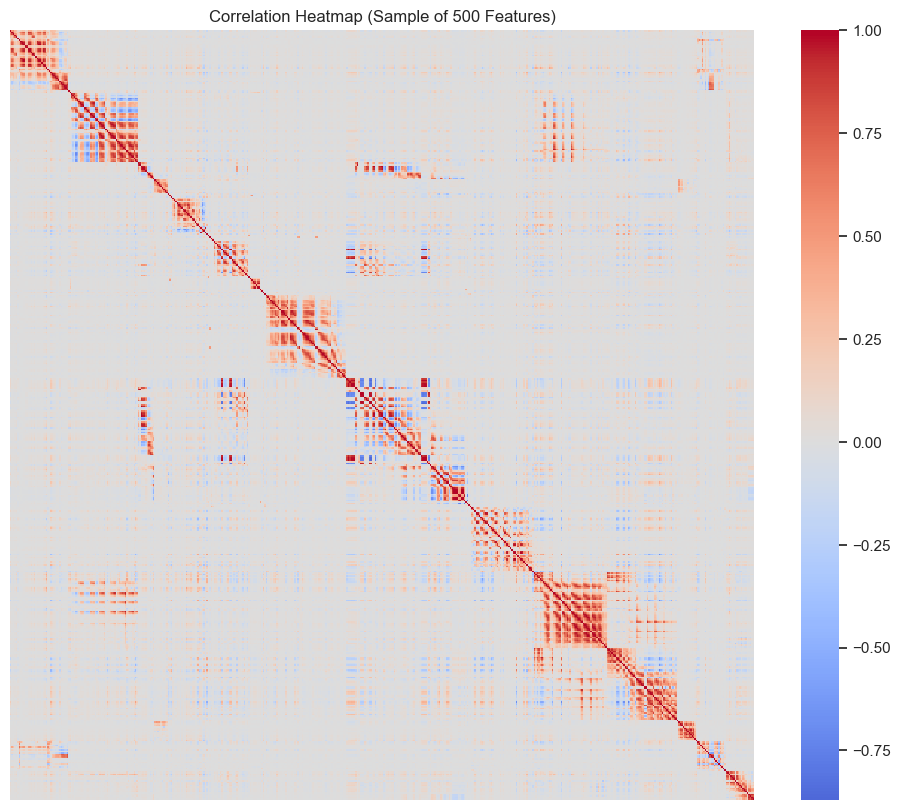

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select a sample of the first 500 columns (as dense)
X_dense_sample = X.iloc[:, :500].values

# Create a DataFrame for easier correlation plotting
X_df = pd.DataFrame(X_dense_sample)

# Compute correlation matrix
corr_matrix = X_df.corr()

# Plot heatmap (limit max value for visual clarity)
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, cbar=True, xticklabels=False, yticklabels=False)
plt.title("Correlation Heatmap (Sample of 500 Features)")
plt.show()


In [6]:
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix

# Ensure X is numeric and has no NaNs before converting to sparse matrix
X_numeric = X.apply(pd.to_numeric, errors='coerce').fillna(0)
X_sparse = csr_matrix(X_numeric)

# Initialize SVD - try reducing to 300 components first
svd = TruncatedSVD(n_components=300, random_state=42)
X_reduced = svd.fit_transform(X_sparse)

print(f"✅ Dimensionality reduced. New shape: {X_reduced.shape}")
explained = svd.explained_variance_ratio_.sum()
print(f"🔍 Total variance explained by 300 components: {explained:.4f}")


✅ Dimensionality reduced. New shape: (31420, 300)
🔍 Total variance explained by 300 components: 1.0000
